In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Datasets/digit-recognizer/train.csv") 

# Convert to numpy array
data = np.array(data)

# Get dimensions and shuffle
m, n = data.shape
np.random.shuffle(data)

# Split into dev and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

# Normalize the data
X_train = X_train / 255.
X_dev = X_dev / 255.

def init_params():
    W1 = np.random.rand(10, 784) * 0.01  # Initialize with smaller weights
    b1 = np.zeros((10, 1))               # Initialize biases with zeros
    W2 = np.random.rand(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    return Z > 0

def softmax(Z):
    # Subtract max value for numerical stability
    exp_values = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_values / np.sum(exp_values, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)  # Apply softmax to Z2, not A1
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))  # 10 classes, directly build as (10, m)
    one_hot_Y[Y.astype(int), np.arange(Y.size)] = 1
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    # Output layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    # Hidden layer
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    accuracies = []
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            accuracies.append(accuracy)
            print(f"Iteration: {i}, Accuracy: {accuracy:.8f}")
    
    return W1, b1, W2, b2, accuracies

# Train the model
W1, b1, W2, b2, accuracies = gradient_descent(X_train, Y_train, 500, 0.1)

# Evaluate on dev set
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_dev)
predictions = get_predictions(A2)
print(f"Dev set accuracy: {get_accuracy(predictions, Y_dev):.4f}")

# Plot the accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(0, 500, 10), accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iterations')
plt.grid(True)
plt.show()

Iteration: 0, Accuracy: 0.09053659
Iteration: 10, Accuracy: 0.09851220
Iteration: 20, Accuracy: 0.09858537
Iteration: 30, Accuracy: 0.11841463
Iteration: 40, Accuracy: 0.18404878
Iteration: 50, Accuracy: 0.20765854
Iteration: 60, Accuracy: 0.22002439
Iteration: 70, Accuracy: 0.22556098
Iteration: 80, Accuracy: 0.23534146
Iteration: 90, Accuracy: 0.25985366
Iteration: 100, Accuracy: 0.30219512
Iteration: 110, Accuracy: 0.35131707
Iteration: 120, Accuracy: 0.40348780
Iteration: 130, Accuracy: 0.44609756
Iteration: 140, Accuracy: 0.49565854
Iteration: 150, Accuracy: 0.56356098
Iteration: 160, Accuracy: 0.64034146
Iteration: 170, Accuracy: 0.69624390
Iteration: 180, Accuracy: 0.73765854
Iteration: 190, Accuracy: 0.76392683
Iteration: 200, Accuracy: 0.77982927
Iteration: 210, Accuracy: 0.79190244
Iteration: 220, Accuracy: 0.80212195
Iteration: 230, Accuracy: 0.81100000
Iteration: 240, Accuracy: 0.81836585
Iteration: 250, Accuracy: 0.82490244
Iteration: 260, Accuracy: 0.83019512
Iteration: 2

In [5]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


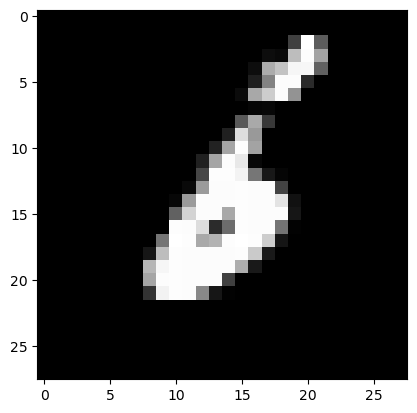

Prediction:  [0]
Label:  0


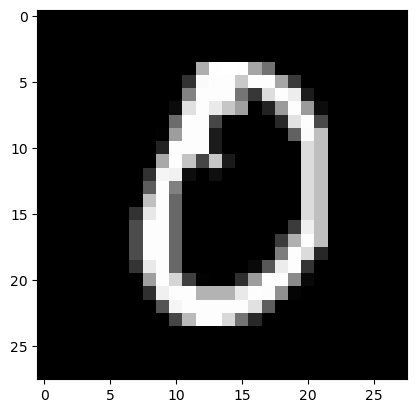

Prediction:  [2]
Label:  2


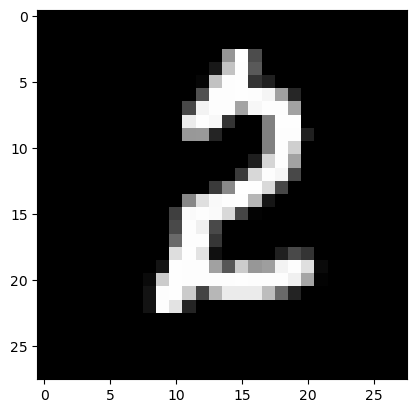

Prediction:  [5]
Label:  5


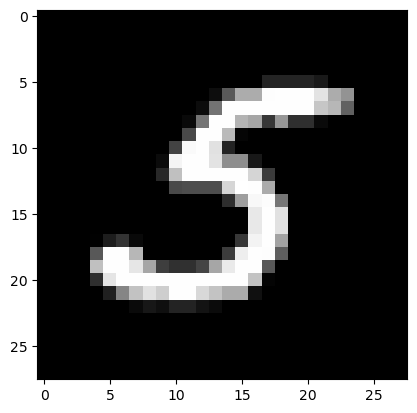

In [7]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)